In [3]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/70/ee/e3562fd4e692afc6ed396b60ce3a177bc4ce6506ac8ac2413886198880e3/protobuf-3.19.6-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6f/77/e624b4916531721e674aa105151ffa5223fb224d3ca4bd5c10574664f944/tensorboard-2.11.2-py3-none-any.whl
  Using cached https

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#TRAIN IMAGE PREPROCESSING

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
#VALIDATION IMAGE PREPROCESSING

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
#BUILDING MODEL

In [9]:
cnn = tf.keras.models.Sequential()

In [ ]:
#Building Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
#COMPILING AND TRAINING PHASE

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 [==============================] - 3124s 1s/step - loss: 0.9368 - accuracy: 0.7138 - val_loss: 0.4986 - val_accuracy: 0.8494
Epoch 2/5
2197/2197 [==============================] - 3117s 1s/step - loss: 0.3944 - accuracy: 0.8745 - val_loss: 0.3421 - val_accuracy: 0.8900
Epoch 3/5
2197/2197 [==============================] - 3068s 1s/step - loss: 0.2412 - accuracy: 0.9214 - val_loss: 0.1791 - val_accuracy: 0.9412
Epoch 4/5
2197/2197 [==============================] - 2833s 1s/step - loss: 0.1685 - accuracy: 0.9452 - val_loss: 0.1504 - val_accuracy: 0.9518
Epoch 5/5
2197/2197 [==============================] - 3107s 1s/step - loss: 0.1255 - accuracy: 0.9590 - val_loss: 0.1378 - val_accuracy: 0.9567


In [ ]:
#EVALUATING MODEL

In [27]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 404s 184ms/step - loss: 0.0554 - accuracy: 0.9810
Training accuracy: 0.980951726436615


In [28]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 91s 165ms/step - loss: 0.1378 - accuracy: 0.9567
Validation accuracy: 0.9566924571990967


In [29]:
#SAVING MODEL

In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
cnn.save('trained_model.h5')

In [32]:
training_history.history #Return Dictionary of history

{'loss': [0.9368468523025513,
  0.39440473914146423,
  0.24120581150054932,
  0.168471559882164,
  0.12554065883159637],
 'accuracy': [0.7138345837593079,
  0.8745003342628479,
  0.9214453101158142,
  0.9452450275421143,
  0.9590155482292175],
 'val_loss': [0.49862441420555115,
  0.342131644487381,
  0.17905279994010925,
  0.1504269242286682,
  0.1377708464860916],
 'val_accuracy': [0.8493626117706299,
  0.8899954557418823,
  0.9412133097648621,
  0.9517983198165894,
  0.9566924571990967]}

In [33]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [35]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
#ACCURACY VISUALISATION

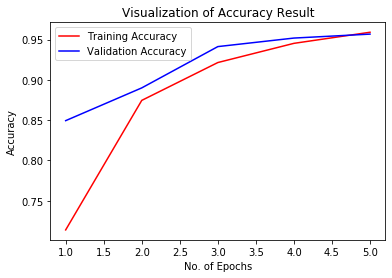

In [41]:
import matplotlib.pyplot as plt

epochs = list(range(1, 6))  # List of epochs from 1 to 5

# Plotting training accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')

# Plotting validation accuracy
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Adding labels and title
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()

# Show the plot
plt.show()



In [42]:
#Some other metrics for model evaluation

In [43]:
class_name = validation_set.class_names

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 233s 13ms/step


In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [47]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [51]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.95      0.94       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.91      0.96      0.94       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.91      0.90       410
                       Corn_(maize)___Common_rust_       0.95      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

In [52]:
#Confusion Matrix Visualization

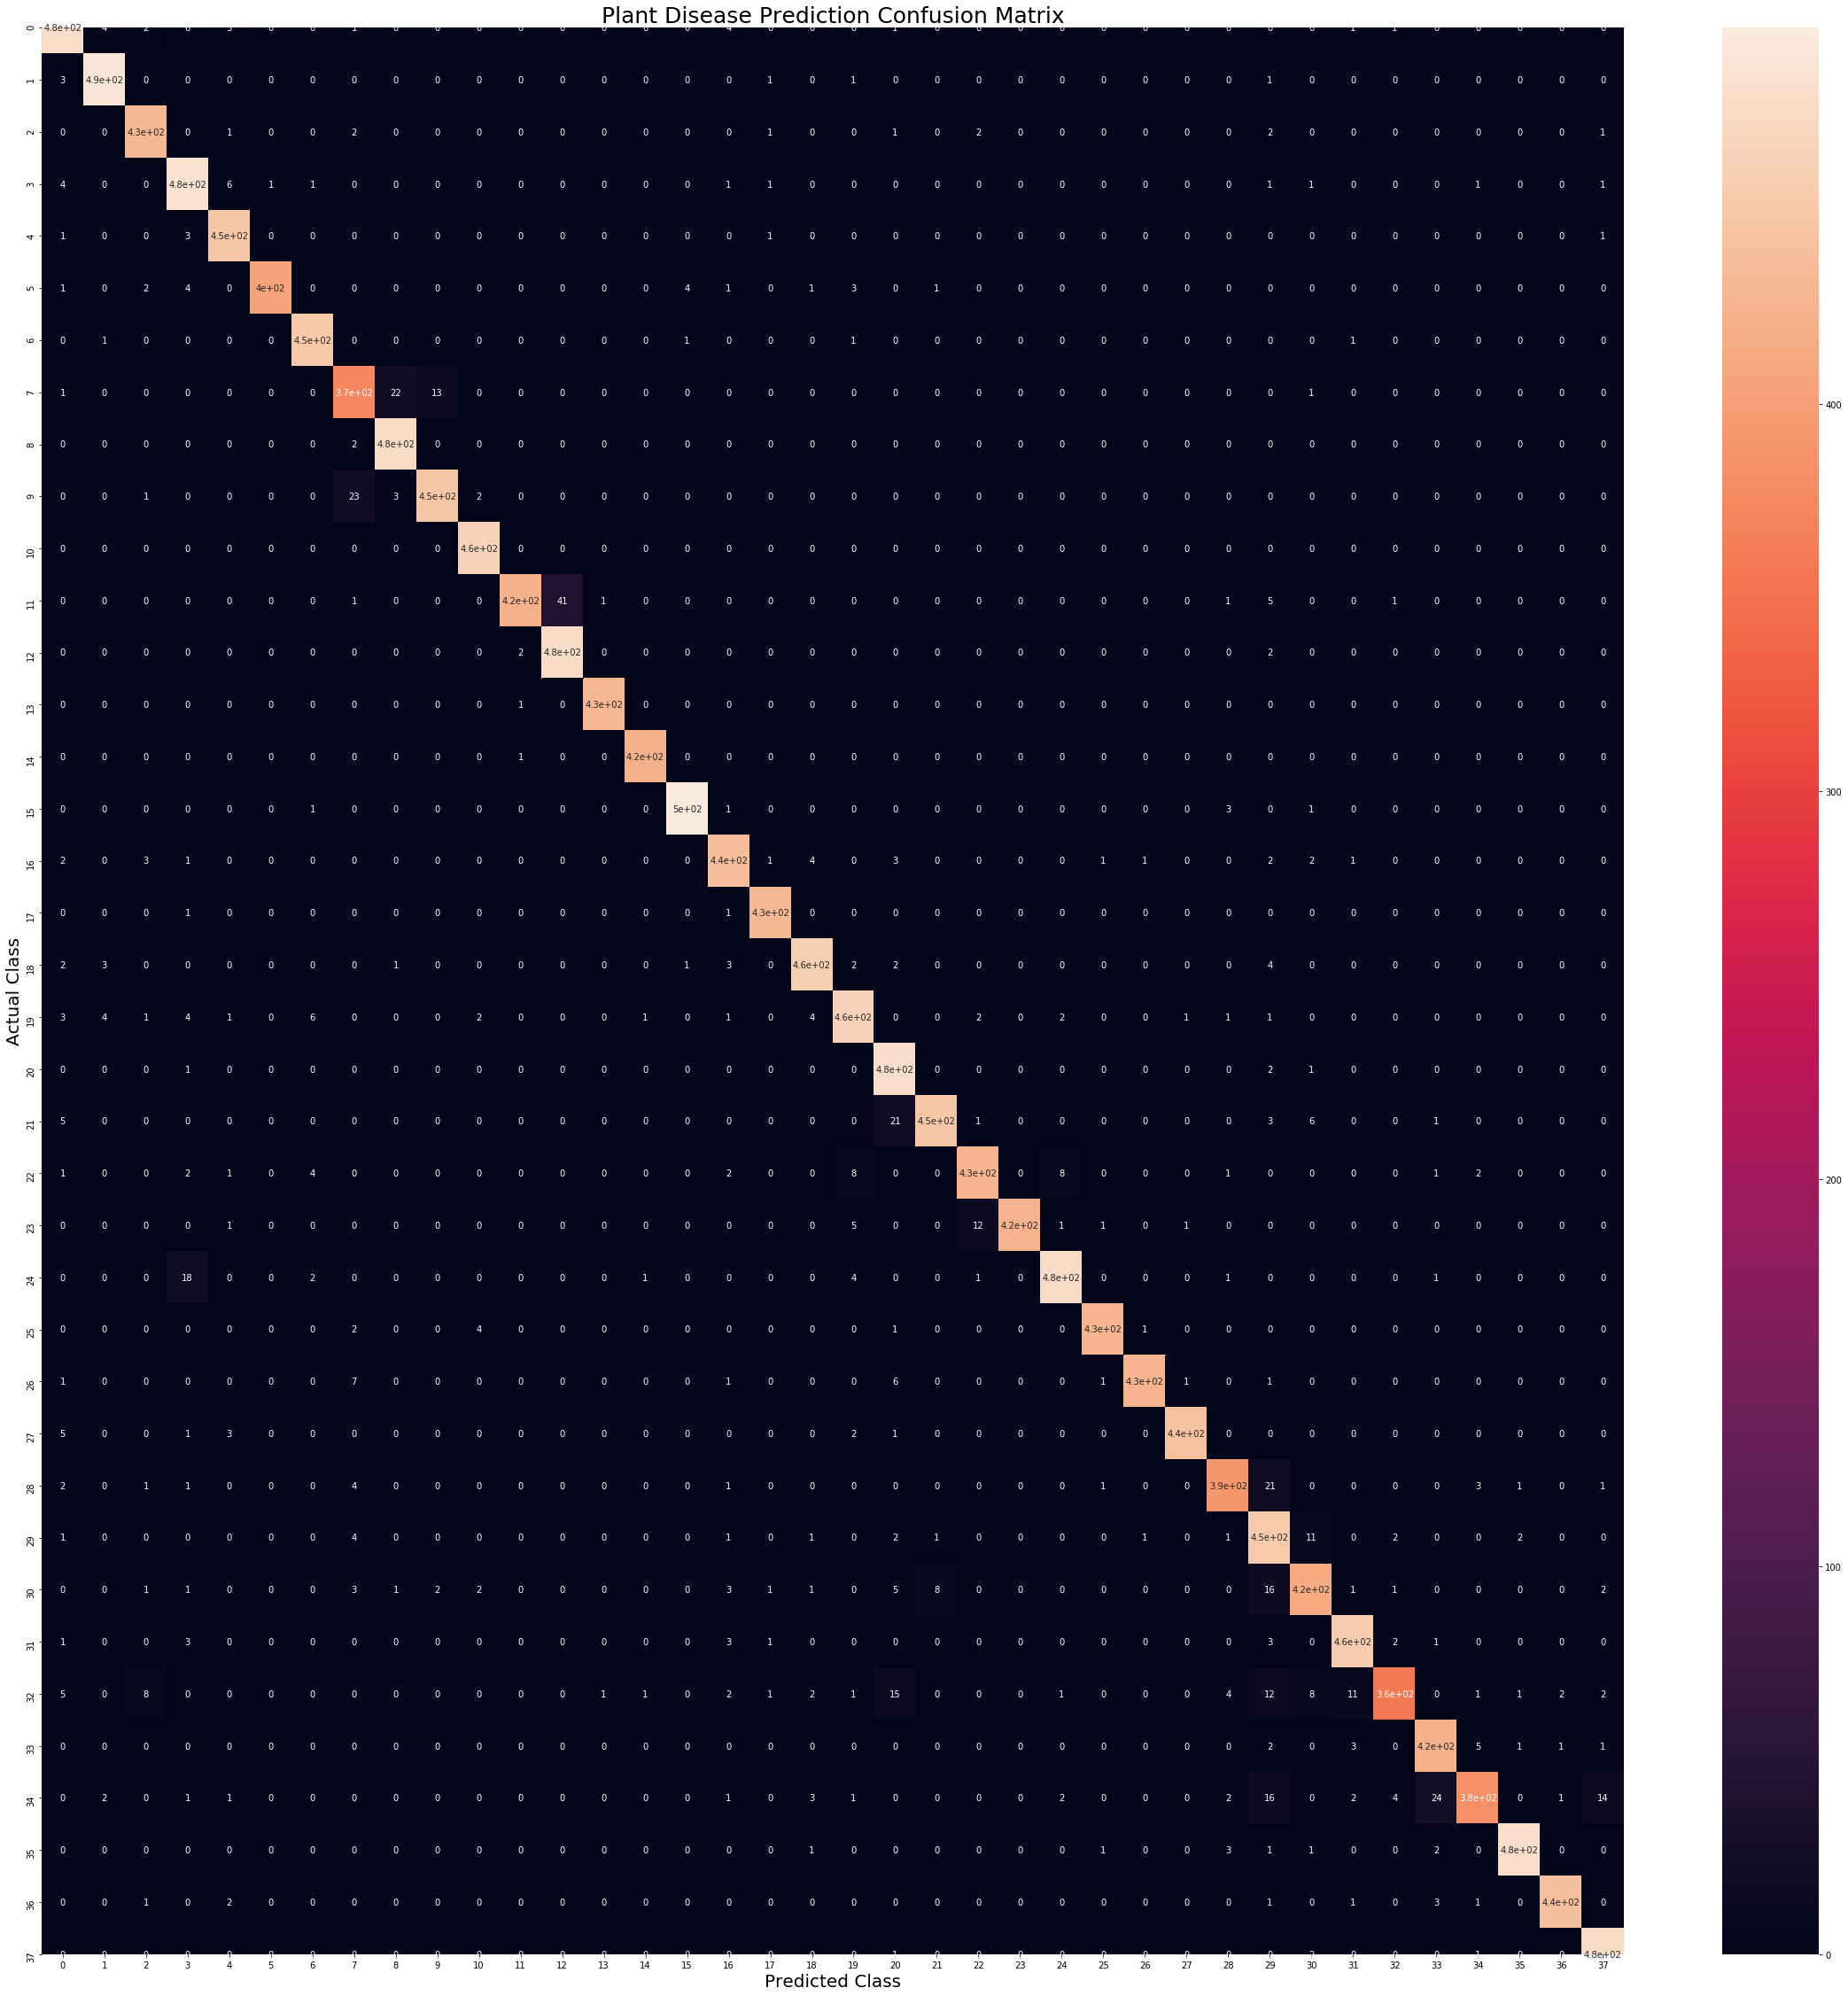

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()